In [1]:
# import library, pandas to read the dataset, matplotlib to visualize data, and re to clean the text 
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'jpeg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
# To remove tag e from describe
pd.set_option("display.float_format",lambda x :"%05f"%x)

In [3]:
# read data stored in file name Car-details.csv using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('Cars Project.csv')

In [4]:
#show first ten dataframe content
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.000000
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.000000
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.000000
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.000000


In [5]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8128.000000,8128.000000,7907.000000
mean,2013.804011,638271.807702,69819.510827,5.416719
std,4.044249,806253.403508,56550.554958,0.959588
min,1983.000000,29999.000000,1.000000,2.000000
25%,2011.000000,254999.000000,35000.000000,5.000000
50%,2015.000000,450000.000000,60000.000000,5.000000
75%,2017.000000,675000.000000,98000.000000,5.000000
max,2020.000000,10000000.000000,2360457.000000,14.000000


In [7]:
# check to null values 
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
# Drop nul values and save in memory
df.dropna(subset=["engine","max_power","torque","seats"], inplace=True)

In [9]:
# check to null values after Drop nal values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [10]:
# Drop columns mileage
df.drop('mileage', axis=1,inplace=True)

In [11]:
# Drop columns max_power
df.drop('max_power', axis=1,inplace=True)

In [12]:
# Drop columns torque
df.drop('torque', axis=1,inplace=True)

In [13]:
df.drop('name', axis=1, inplace=True)

In [14]:
# check on columns 
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'engine', 'seats'],
      dtype='object')

In [15]:
# Do you know how many cars are most popular on the market, diesel or petrol or CNG or LPG?
fuel_car = df['fuel'].value_counts()
fuel_car

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

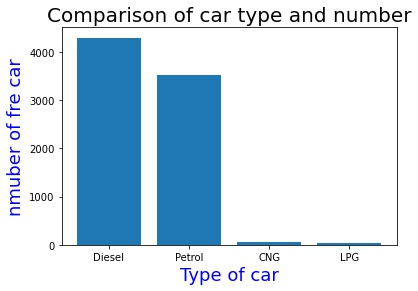

In [16]:
#Display the results in a graph using plt.bar
plt.bar(fuel_car.index, fuel_car.values)
plt.title("Comparison of car type and number", size='20')
plt.xlabel("Type of car", color="b",size='18')
plt.ylabel("nmuber of fre car", color="b",size='18')
plt.show()

In [17]:
#Define a variable with a name Selling_car and display the first 15 rows for comparison
Selling_car = df.head(15)
Selling_car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.000000
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197 CC,5.000000
6,2007,96000,175000,LPG,Individual,Manual,First Owner,1061 CC,5.000000
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,796 CC,4.000000
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,1364 CC,5.000000
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,1399 CC,5.000000


In [18]:
# Arrange the colum 'selling_price' from largest to smallest use ascending=False in order from smallest to largest 
Selling_car.sort_values(['selling_price'],ascending=False)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
10,2014,500000,68000,Diesel,Individual,Manual,Second Owner,1461 CC,5.000000
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197 CC,5.000000
15,2016,400000,40000,Petrol,Individual,Manual,First Owner,1198 CC,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.000000
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,1364 CC,5.000000
12,2009,280000,140000,Diesel,Individual,Manual,Second Owner,1248 CC,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,1399 CC,5.000000
14,2009,180000,90000,Petrol,Individual,Manual,Second Owner,1061 CC,5.000000


In [19]:
#Display the results in a graph using plot.bar and groupby betwwen colam name and selling_price extract the largest number from max() 
Selling_car.groupby('name').selling_price.max().plot(kind='bar')
plt.title("Comparison of the type of car and the selling pricer", size='15')
plt.xlabel("Type of car", color="g",size='12')
plt.ylabel("selling pricer", color="g",size='12')
plt.savefig('x.png')
plt.legend();

KeyError: 'name'

In [20]:
#Define a variable with a name Seata_carand display the first 15 rows for comparison
Seata_car = df.head(15)
Seata_car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.000000
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197 CC,5.000000
6,2007,96000,175000,LPG,Individual,Manual,First Owner,1061 CC,5.000000
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,796 CC,4.000000
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,1364 CC,5.000000
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,1399 CC,5.000000


In [21]:
# Arrange the colum 'seats' from largest to smallest use ascending=False in order from smallest to largest 
Seata_car['seats'].sort_values(ascending=False)

0    5.000000
1    5.000000
2    5.000000
3    5.000000
4    5.000000
5    5.000000
6    5.000000
8    5.000000
9    5.000000
10   5.000000
11   5.000000
12   5.000000
14   5.000000
15   5.000000
7    4.000000
Name: seats, dtype: float64

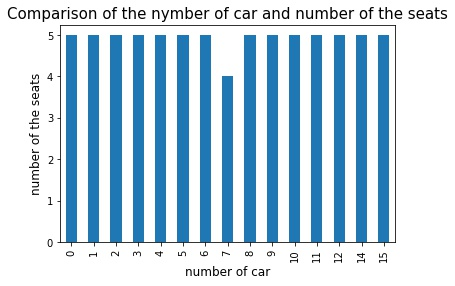

In [22]:
#Display the results in a graph using plot(bar) 
Seata_car['seats'].plot(kind='bar');
plt.title("Comparison of the nymber of car and number of the seats", size='15')
plt.xlabel("number of car", color="k",size='12')
plt.ylabel("number of the seats", color="k",size='12');

In [23]:
# Verify the number of Manual and automatic cars and Store values variable name type_car 
type_car = df.transmission.value_counts()
type_car

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

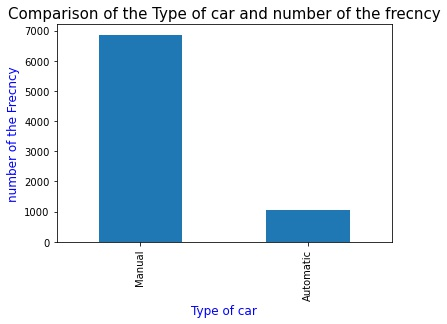

In [24]:
# Explanation of the result of the type of car Manual or automatic use plot(bar)
type_car.plot(kind='bar')
plt.title("Comparison of the Type of car and number of the frecncy", size='15')
plt.xlabel("Type of car", color="b",size='12')
plt.ylabel("number of the Frecncy", color="b",size='12');

In [25]:
#Define a variable with a name Km_car and display the first 15 rows for comparison
Km_car = df.head(15)
Km_car

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.000000
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,1197 CC,5.000000
6,2007,96000,175000,LPG,Individual,Manual,First Owner,1061 CC,5.000000
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,796 CC,4.000000
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,1364 CC,5.000000
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,1399 CC,5.000000


In [26]:
# Arrange the colum 'km_driven' from largest to smallest use ascending=False in order from smallest to largest 
Km_car.sort_values(['km_driven'],ascending=False)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
6,2007,96000,175000,LPG,Individual,Manual,First Owner,1061 CC,5.000000
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,1399 CC,5.000000
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.000000
12,2009,280000,140000,Diesel,Individual,Manual,Second Owner,1248 CC,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.000000
11,2005,92000,100000,Petrol,Individual,Manual,Second Owner,993 CC,5.000000
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,1364 CC,5.000000


In [27]:
# Explanation of the result of the type of car Manual or automatic use plot(bar)
Km_car.plot(x='name', y='km_driven', kind='barh',color="red")
plt.title("Comparison of the name of car and number of the km_driven", size='15')
plt.xlabel("name of car", color="k",size='12')
plt.ylabel("number of the kilo", color="k",size='12');

KeyError: 'name'

In [28]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.000000
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,1197 CC,5.000000
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493 CC,5.000000
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,1248 CC,5.000000
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,1396 CC,5.000000


In [29]:
df['engine']= df['engine'].str.replace('CC','').astype('int')
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,5.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,5.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,5.000000
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,5.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,5.000000
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,1197,5.000000
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493,5.000000
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,1248,5.000000
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,1396,5.000000


In [30]:
pd.get_dummies(df)

,year,selling_price,km_driven,engine,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,1248,5.000000,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,370000,120000,1498,5.000000,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2006,158000,140000,1497,5.000000,0,0,0,1,0,1,0,0,1,0,0,0,0,1
3,2010,225000,127000,1396,5.000000,0,1,0,0,0,1,0,0,1,1,0,0,0,0
4,2007,130000,120000,1298,5.000000,0,0,0,1,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1197,5.000000,0,0,0,1,0,1,0,0,1,1,0,0,0,0
8124,2007,135000,119000,1493,5.000000,0,1,0,0,0,1,0,0,1,0,1,0,0,0
8125,2009,382000,120000,1248,5.000000,0,1,0,0,0,1,0,0,1,1,0,0,0,0
8126,2013,290000,25000,1396,5.000000,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [31]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=25, random_state=3)

In [33]:
lm = LinearRegression()


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

ValueError: could not convert string to float: 'Diesel'

In [ ]:
train_test_split(X, y, test_size=0.2, random_state=42)